In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import tensorflow.keras as ks

#unsupervised:
from sklearn.cluster import KMeans
#transformers:
from sklearn.preprocessing import OneHotEncoder, TargetEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import scipy.stats as st

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#Note: train data has 13 feature column and 1 binary label for a total of 14 columns

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head(4)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0


In [4]:
train.shape

(165034, 14)

(array([ 8058.,  6627., 13752., 17762., 20562., 17219., 22634., 21617.,
        24251., 12552.]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <BarContainer object of 10 artists>)

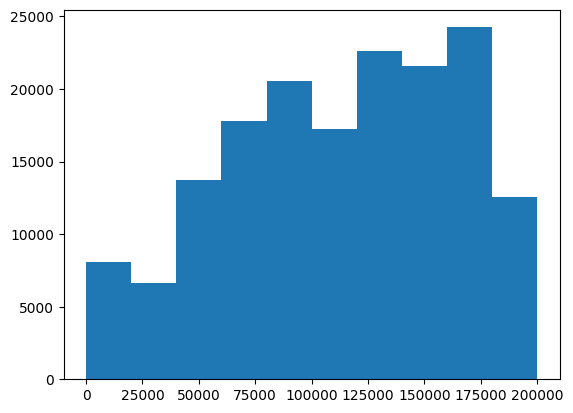

In [5]:
plt.hist(train.EstimatedSalary)

In [6]:
a = pd.cut(train.EstimatedSalary, bins = [0,25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000])

In [7]:
b = pd.merge(a, train.Exited, left_index = True, right_index = True)
contingency = pd.crosstab(b.EstimatedSalary, b.Exited)
contingency

Exited,0,1
EstimatedSalary,,
"(0, 25000]",7284,1899
"(25000, 50000]",8705,2056
"(50000, 75000]",17309,4783
"(75000, 100000]",19871,4854
"(100000, 125000]",18765,4883
"(125000, 150000]",22528,6067
"(150000, 175000]",21234,6143
"(175000, 200000]",14417,4236


In [8]:
result = st.chi2_contingency(contingency)
result

Chi2ContingencyResult(statistic=123.7070362038302, pvalue=1.2936396835187625e-23, dof=7, expected_freq=array([[ 7239.88801701,  1943.11198299],
       [ 8483.9850758 ,  2277.0149242 ],
       [17417.35882303,  4674.64117697],
       [19493.21912454,  5231.78087546],
       [18644.1110559 ,  5003.8889441 ],
       [22544.33168317,  6050.66831683],
       [21584.05904844,  5792.94095156],
       [14706.0471721 ,  3946.9528279 ]]))

In [36]:
#optimizer:
def cutOptimizer(colname, dataframe):
    output = []
    print("chi-square stat, independence test for {} and Exited variables".format(colname))
    for i in range(2,12):
        v = pd.cut(dataframe[colname], bins = i)
        v1 = pd.merge(v,dataframe.Exited, left_index = True, right_index = True)
        v2 = pd.crosstab(v1[colname], v1.Exited)
        result = st.chi2_contingency(v2)
        output.append({"n_bins": i, "stat": result.statistic, "p_value": result.pvalue})
    return pd.DataFrame(output)
    
    

In [37]:
dd = cutOptimizer("EstimatedSalary", train)
dd

chi-square stat, independence test for EstimatedSalary and Exited variables


,n_bins,stat,p_value
0,2,43.004907,5.460273e-11
1,3,84.376195,4.763675e-19
2,4,84.866987,2.771451e-18
3,5,92.860427,3.248401e-19
4,6,110.252893,3.622889e-22
5,7,100.210937,2.267475e-19
6,8,123.707036,1.293640e-23
7,9,140.622586,1.761066e-26
8,10,121.499977,6.587280e-22
9,11,120.021210,5.010147e-21


In [18]:
# Optimize at bins == 9. Now, see the bins:
r = pd.cut(train.EstimatedSalary, bins = 9)
r

0         (177772.38, 199992.48]
1           (44451.78, 66671.88]
2         (177772.38, 199992.48]
3           (66671.88, 88891.98]
4           (-188.401, 22231.68]
                   ...          
165029    (111112.08, 133332.18]
165030    (111112.08, 133332.18]
165031    (111112.08, 133332.18]
165032      (66671.88, 88891.98]
165033      (44451.78, 66671.88]
Name: EstimatedSalary, Length: 165034, dtype: category
Categories (9, interval[float64, right]): [(-188.401, 22231.68] < (22231.68, 44451.78] < (44451.78, 66671.88] < (66671.88, 88891.98] ... (111112.08, 133332.18] < (133332.18, 155552.28] < (155552.28, 177772.38] < (177772.38, 199992.48]]

In [24]:
np.unique(r)

array([Interval(-188.401, 22231.68, closed='right'),
       Interval(22231.68, 44451.78, closed='right'),
       Interval(44451.78, 66671.88, closed='right'),
       Interval(66671.88, 88891.98, closed='right'),
       Interval(88891.98, 111112.08, closed='right'),
       Interval(111112.08, 133332.18, closed='right'),
       Interval(133332.18, 155552.28, closed='right'),
       Interval(155552.28, 177772.38, closed='right'),
       Interval(177772.38, 199992.48, closed='right')], dtype=object)

In [25]:
# Optimized Transformer:
class SalaryTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.targetEncoder = TargetEncoder()
        self.bins = [0,22231.68, 44451.78, 66671.88, 88891.98,111112.08, 133332.18,
                     155552.28, 177772.38, 200000]
    def fit(self, X, y):
        a = pd.cut(X.EstimatedSalary, bins = self.bins)
        b = np.array(a).reshape(-1,1)
        self.targetEncoder.fit(b, y)
        return self

    def transform(self, X):
        a = pd.cut(X.EstimatedSalary, bins = self.bins)
        b = np.array(a).reshape(-1,1)
        return self.targetEncoder.transform(b)
        
        

In [26]:
a = SalaryTransformer()
a.fit(train, train.Exited)

SalaryTransformer()

In [27]:
a.transform(train)

array([[0.22415706],
       [0.21914357],
       [0.22415706],
       ...,
       [0.20844261],
       [0.19523046],
       [0.21914357]])